# 4. Análisis, gráficas e hipótesis

![alt text](docs/img/Steam2.jpg "Title")

En este capítulo reformularemos nuestras primeras hipótesis y realizaremos la representación gráfica de los datos

### Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from utils.constantes import *

### Carga de datos

In [2]:
df = pd.read_csv('data/processed/MainDF_full.csv', parse_dates=['Release date'])
df

,ID,Game,Release date,Price,Owners,Developer(s),Publisher(s),Top level genre,Genres,Subgenres,Visuals,Players
0,105600,Terraria,2011-05-16,9.99,"20,000,000 .. 50,000,000",Re-Logic,Re-Logic,Adventure,Sandbox,Open World Survival Craft,2D,Co-op
1,620,Portal 2,2011-04-18,9.99,"10,000,000 .. 20,000,000",Valve,Valve,Puzzle,Platformer,3D Platformer,First-Person,Co-op
2,72850,The Elder Scrolls V: Skyrim,2011-11-10,19.99,"5,000,000 .. 10,000,000",Bethesda Game Studios,Bethesda Softworks,RPG,Open World,NaN,First-Person,Singleplayer
3,1286830,STAR WARS: The Old Republic,2011-12-20,0.00,"5,000,000 .. 10,000,000",Broadsword,Electronic Arts,RPG,MMORPG,CRPG,Third Person,Massively Multiplayer
4,113400,APB Reloaded,2011-12-06,0.00,"5,000,000 .. 10,000,000",Reloaded Productions,Little Orbit,Action,Open World,Third-Person Shooter,Third Person,Massively Multiplayer
...,...,...,...,...,...,...,...,...,...,...,...,...
49612,346060,Disney High School Musical 3: Senior Year Dance,2008-10-28,19.99,"0 .. 20,000",Page 44 Studios,Disney,Adventure,Shooter,NaN,NaN,NaN
49613,51010,My Tribe,2008-11-28,9.99,"0 .. 20,000",Big Fish Games,Big Fish Games,Simulation,NaN,NaN,NaN,NaN
49614,16100,Virtual Villagers: A New Home,2008-05-12,9.99,"0 .. 20,000",Last Day of Work,Last Day of Work,Simulation,NaN,NaN,NaN,NaN
49615,16180,Virtual Villagers - The Secret City,2008-05-28,9.99,"0 .. 20,000",Last Day of Work,Last Day of Work,Simulation,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49617 entries, 0 to 49616
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ID               49617 non-null  int64         
 1   Game             49617 non-null  object        
 2   Release date     49546 non-null  datetime64[ns]
 3   Price            47006 non-null  float64       
 4   Owners           49617 non-null  object        
 5   Developer(s)     49488 non-null  object        
 6   Publisher(s)     49507 non-null  object        
 7   Top level genre  49209 non-null  object        
 8   Genres           34254 non-null  object        
 9   Subgenres        27720 non-null  object        
 10  Visuals          35013 non-null  object        
 11  Players          28013 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 4.5+ MB


### Asignación de categórica a columna 'Owners'

In [95]:
from pandas.api.types import CategoricalDtype
owner_cat = CategoricalDtype(categories=['0\xa0..\xa020,000',
                                         '20,000\xa0..\xa050,000',
                                         '50,000\xa0..\xa0100,000',
                                         '100,000\xa0..\xa0200,000',
                                         '200,000\xa0..\xa0500,000',
                                         '500,000\xa0..\xa01,000,000',
                                         '1,000,000\xa0..\xa02,000,000',
                                         '2,000,000\xa0..\xa05,000,000',
                                         '5,000,000\xa0..\xa010,000,000',
                                         '10,000,000\xa0..\xa020,000,000',
                                         '20,000,000\xa0..\xa050,000,000',
                                         '50,000,000\xa0..\xa0100,000,000',
                                         '100,000,000\xa0..\xa0200,000,000',
                                         '200,000,000\xa0..\xa0500,000,000',],
                                         ordered=True)
df['Owners'] = df['Owners'].astype(owner_cat)

## 4.1 Análisis univariante

### 4.1.1 Release date

Número de **publicaciones por mes** totales desde 2008 a 2022

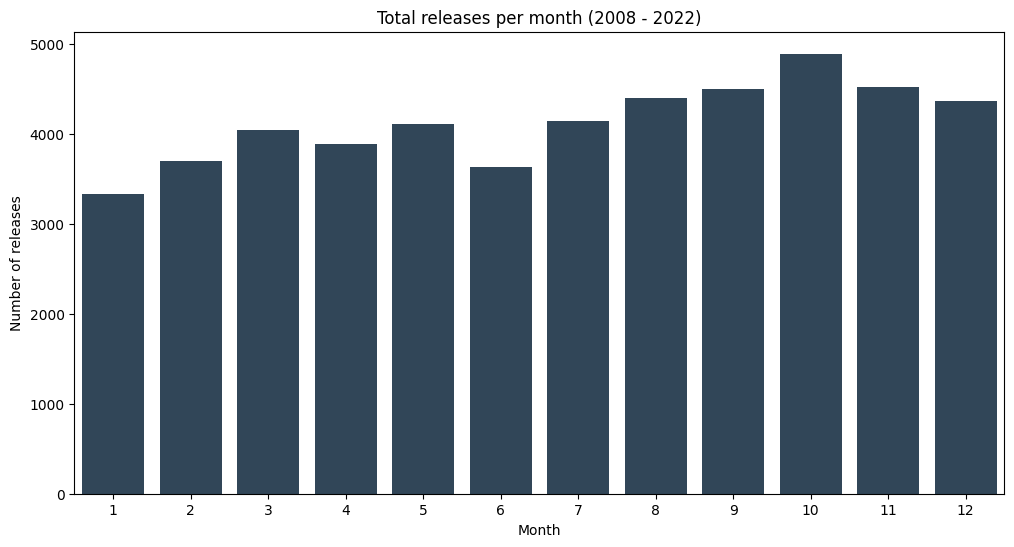

In [96]:
games_per_month = df.dropna(subset=['Release date']).sort_values('Release date')['Release date'].dt.month

plt.figure(figsize=(12,6))

sns.countplot(x='Release date', data=pd.DataFrame(games_per_month), color=c4).set(
    xlabel='Month', ylabel='Number of releases', title='Total releases per month (2008 - 2022)');

¿Ha sido **octubre** siempre el mes en el que más juegos se han publicado?<br>
Comprobémoslo:

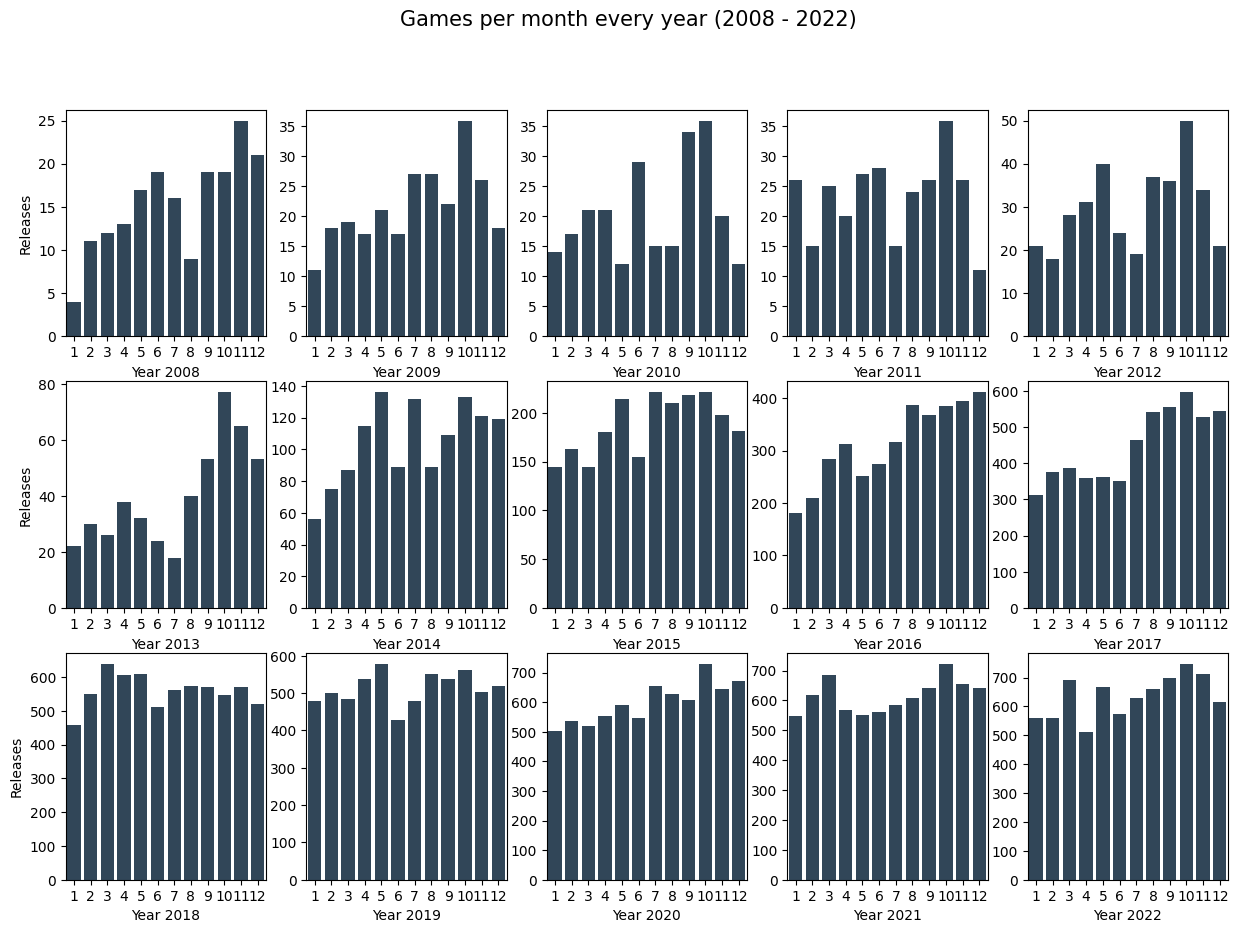

In [97]:
year_list = df.dropna(subset=['Release date']).sort_values(by='Release date')['Release date'].dt.year.unique()

fig = plt.figure(figsize=(15,10))
fig.suptitle('Games per month every year (2008 - 2022)', fontsize=15)

for index, year in enumerate(year_list):
    plt.subplot(3,5,index+1).set(xlabel=f'Year {year}', ylabel=' ')
    if index + 1 in [1,6,11]:
        plt.subplot(3,5,index+1).set(ylabel='Releases')
    sns.countplot(x='Release date', data=pd.DataFrame(df[df['Release date'].dt.year == year]['Release date'].dt.month), color=c4);

Por las gráficas se puede apreciar que:
- Octubre ha sido el mes en el que más juegos se han publicado en los años 2008 - 2012
- En los años siguientes lo ha sido la mayor parte de las veces

Esto puede deberse a la temporada de **Halloween**, en la que los desarrolladores de juegos de terror aprovechan para publicar sus títulos.<br><br>
Además:
- La cantidad publicaciones por mes a lo largo de los años no parece ir acomodándose a un patrón concreto<br>

¿La **publicación de juegos a lo largo de los días del mes** sigue algún patrón concreto?<br>
Veamos:

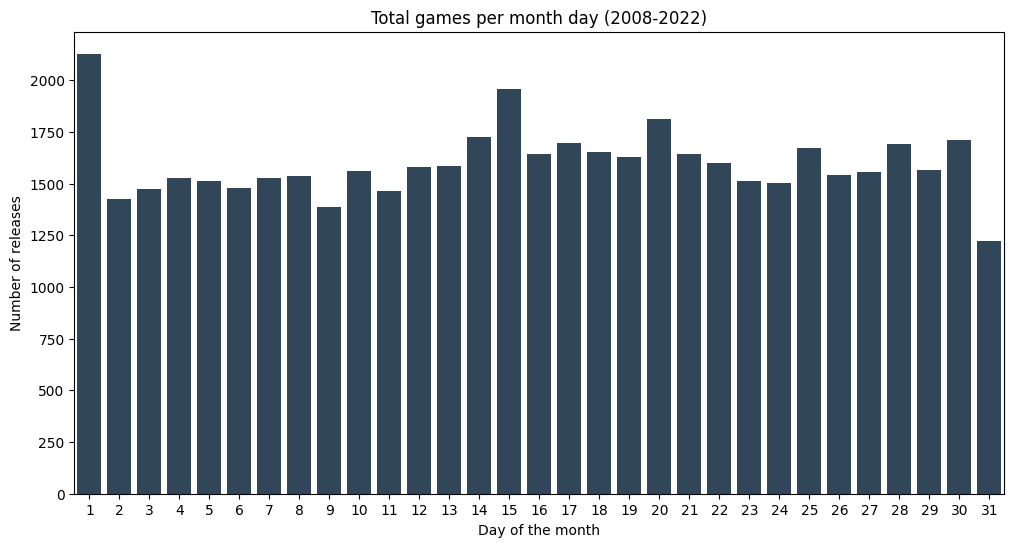

In [98]:
games_per_month_day = df.dropna(subset=['Release date'])['Release date'].dt.day

plt.figure(figsize=(12,6))

sns.countplot(x='Release date', data=pd.DataFrame(games_per_month_day), color=c4).set(
    xlabel='Day of the month', ylabel='Number of releases', title='Total games per month day (2008-2022)');

Vemos que la distribución de la publicación de juegos a lo largo de los días del mes es **uniforme**, a excepción de los días 1, donde se produce un **máximo** de publicaciones.<br>
Lógicamente, en los días 31 se produce un **mínimo**, pero eso sólo es debido a que no todos los meses tienen 31 días y por ello la gráfica se ve afectada.<br><br>
Podríamos ir un paso más allá y comprobar cuál es la ditribución de las publicaciones de cada mes *en concreto*, pero basándonos en esta gráfica parece innecesario.

Por último, veamos cómo ha evolucionado la cantidad de **títulos publicados por año** a lo largo del periodo 2008 - 2022

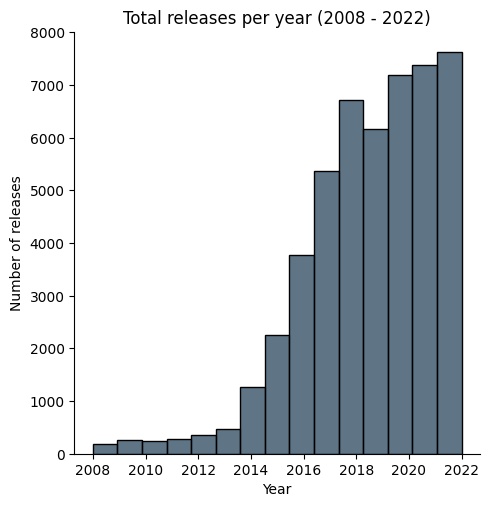

In [99]:
total_games_per_year = df.dropna(subset=['Release date'])['Release date'].dt.year.sort_values()

sns.displot(total_games_per_year, color=c4, bins=15, kde=False).set(xlabel='Year', ylabel='Number of releases', title='Total releases per year (2008 - 2022)');

La tendencia es claramente ascendente

### 4.1.2 Price

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\1206749078.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price']).set(title='Distribución de precios');


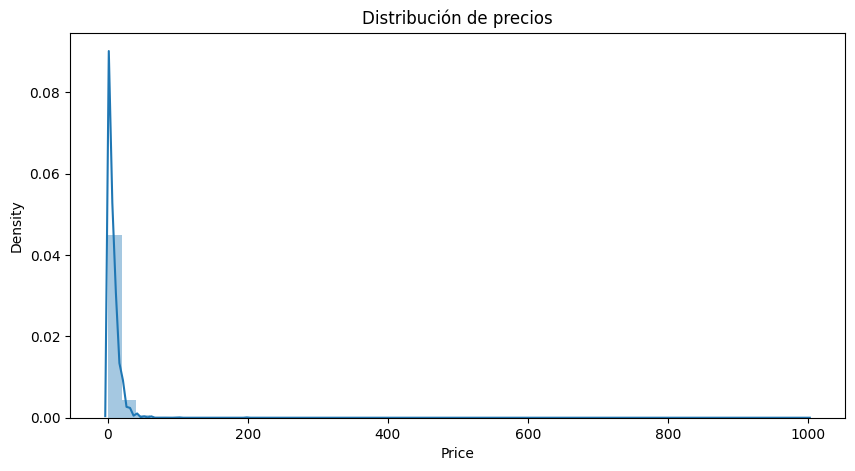

In [100]:
plt.figure(figsize=(10,5))
sns.distplot(df['Price']).set(title='Distribución de precios');

Lo primero que observamos al representar esta gráfica, es que se nos han escapado algunos precios "sospechosos" (ya es raro que un juego valga más de 100$).<br>
Investiguemos:

In [101]:
df[(df['Price'] > 100)].head()

,ID,Game,Release date,Price,Owners,Developer(s),Publisher(s),Top level genre,Genres,Subgenres,Visuals,Players
3898,1538090,Virtual Orator,2015-05-01,199.99,"0 .. 20,000",Virtual Human Technologies,Virtual Human Technologies,Simulation,NaN,Education,VR,Singleplayer
16541,642660,VRemedies - MRI Procedure Experience,2018-05-05,199.99,"0 .. 20,000",StaplesVR,StaplesVR,Simulation,NaN,NaN,VR,NaN
17902,951030,Derelict (DO NOT BUY),2018-12-03,199.99,"0 .. 20,000",JEPR DEV,JEPR DEV,Action,NaN,FPS,NaN,NaN
22755,1103060,Run Thief,2019-08-23,199.99,"0 .. 20,000",H.G.G.,H.G.G.,Casual,NaN,Runner,NaN,NaN
23347,1184470,ASTROPUPPA,2019-12-06,199.99,"0 .. 20,000",Dev.Id Games,Dev.Id Games,Casual,NaN,Bullet Hell,Pixel Graphics,NaN


Al echar un vistazo a algunos de estos títulos, descubrimos que se tratan de bromas (e.g.: *ASTROPUPPA* o *Derelict (DO NOT BUY)*), errores (e.g.: *Run Thief*), o incluso estafas (todos los juegos de TITA Studios son *asset flips*, copias de juegos basadas en assets gratuitos). <br>
Por seguridad, desecharemos estos títulos.

In [3]:
df.drop(df[(df['Price'] > 100)].index, axis=0, inplace=True)
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49590 entries, 0 to 49589
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            49590 non-null  int64         
 1   ID               49590 non-null  int64         
 2   Game             49590 non-null  object        
 3   Release date     49519 non-null  datetime64[ns]
 4   Price            46979 non-null  float64       
 5   Owners           49590 non-null  object        
 6   Developer(s)     49461 non-null  object        
 7   Publisher(s)     49480 non-null  object        
 8   Top level genre  49183 non-null  object        
 9   Genres           34238 non-null  object        
 10  Subgenres        27702 non-null  object        
 11  Visuals          34992 non-null  object        
 12  Players          27996 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 4.9+ MB


El aspecto de nuestra gráfica ahora tiene mucho más sentido

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3173591513.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], color=c4).set(title='Distribución de precios');


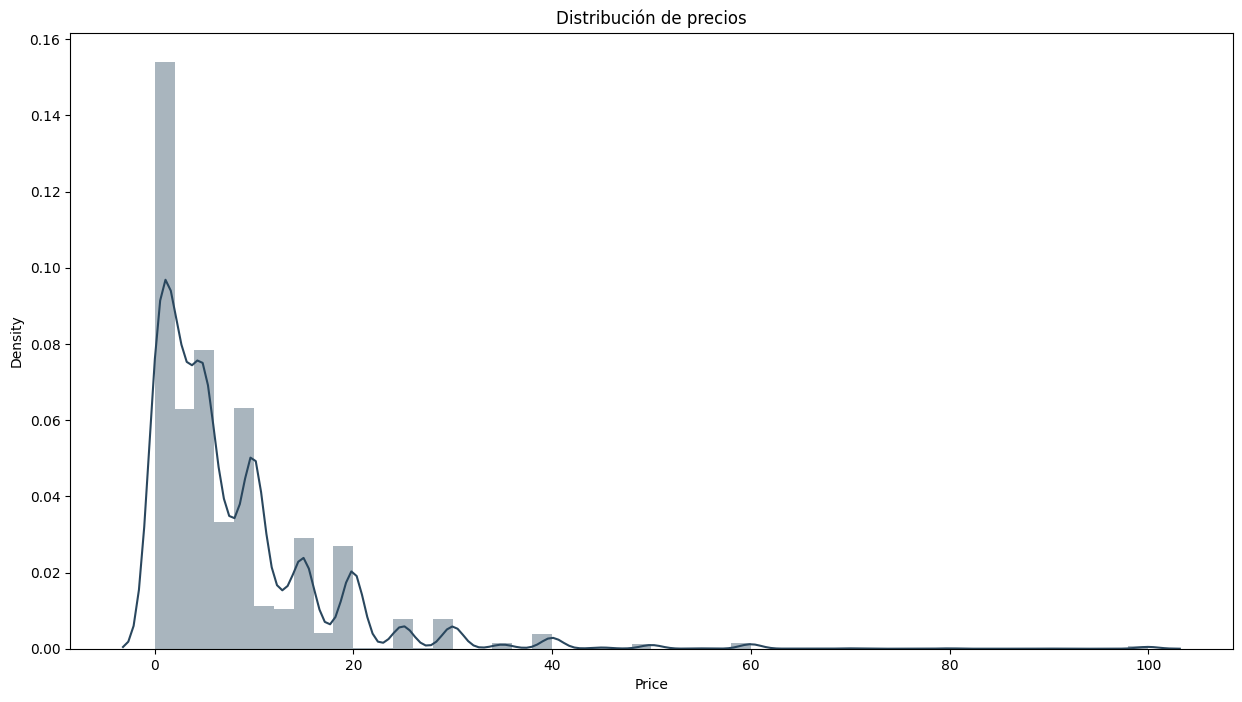

In [103]:
plt.figure(figsize=(15,8))
sns.distplot(df['Price'], color=c4).set(title='Distribución de precios');

Lo primero que observamos es que **no es una distribución normal**, ya que no es unimodal.<br>
También, la mayor parte de los precios se concentran entre los 0 y los 20$. Este factor confirma que Steam es una plataforma centrada principalmente en juegos indies, y menos enfocada a los juegos AAA cuyos precios se suelen encontrar en el rango de los 40$ - 60$.<br>
Ahora veamos algunas estadísticas básicas.

In [104]:
# Moda:
print(df['Price'].mode())
# Mediana:
print('Mediana:', df['Price'].median())

0    4.99
Name: Price, dtype: float64
Mediana: 4.99


In [105]:
df[['Price']].describe()

,Price
count,46979.000000
mean,7.749206
std,9.137702
min,0.000000
25%,1.990000
50%,4.990000
75%,9.990000
max,99.990000


Si el percentil se encuentra en el valor 9.99 y el máximo en 99.99 debe haber muchos outliers. <br>
Lo comprobamos con un boxplot:

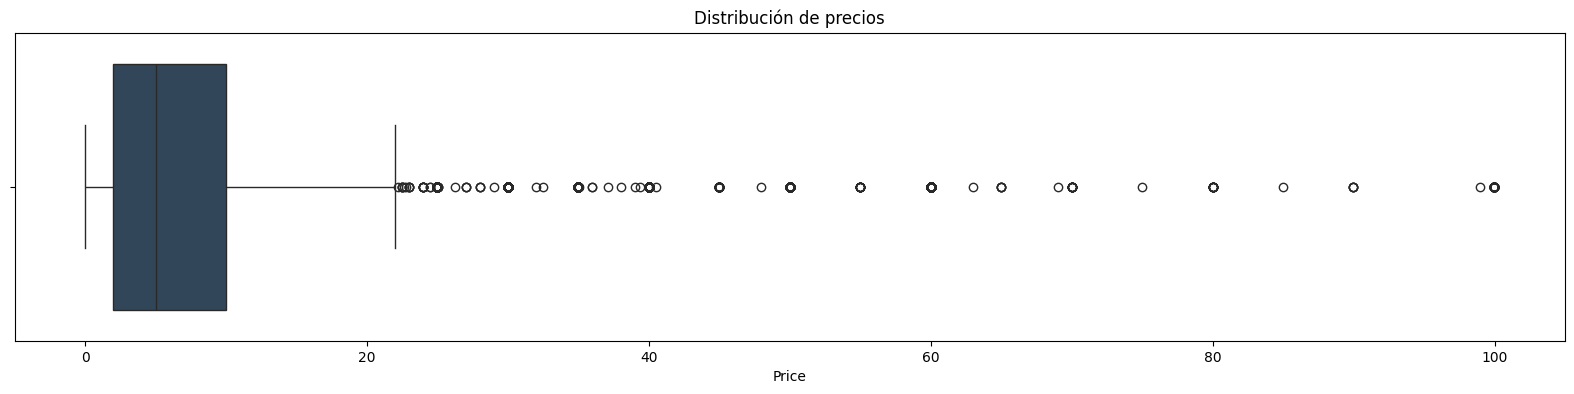

In [106]:
plt.figure(figsize=(20,4))
sns.boxplot(df['Price'], orient='h', color=c4).set(title='Distribución de precios');

### Etiquetas 'Top level genre', 'Genres', 'Subgenres', 'Visuals' y 'Players'

Comprobamos su **cardinalidad**

In [107]:
for i in df.columns[-6:]:
    print(f"La cardinalidad de la columna '{i}' es {(df[i].nunique()/df.shape[0])*100:.2f}%")

La cardinalidad de la columna 'Publisher(s)' es 55.00%
La cardinalidad de la columna 'Top level genre' es 0.02%
La cardinalidad de la columna 'Genres' es 0.12%
La cardinalidad de la columna 'Subgenres' es 0.12%
La cardinalidad de la columna 'Visuals' es 0.06%
La cardinalidad de la columna 'Players' es 0.02%


Como veremos más adelante en el apartado de gráficas, sólo nos interesan las columnas con un **porcentaje inferior al 0.1%**

#### 4.1.3 Top level genre

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2264476722.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Top level genre', data=df, palette=steam_palette, order=top_level_genres).set(title="Juegos publicados según su 'Top level genre'")
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2264476722.py:2: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Top level genre', data=df, palette=steam_palette, order=top_level_genres).set(title="Juegos publicados según su 'Top level genre'")


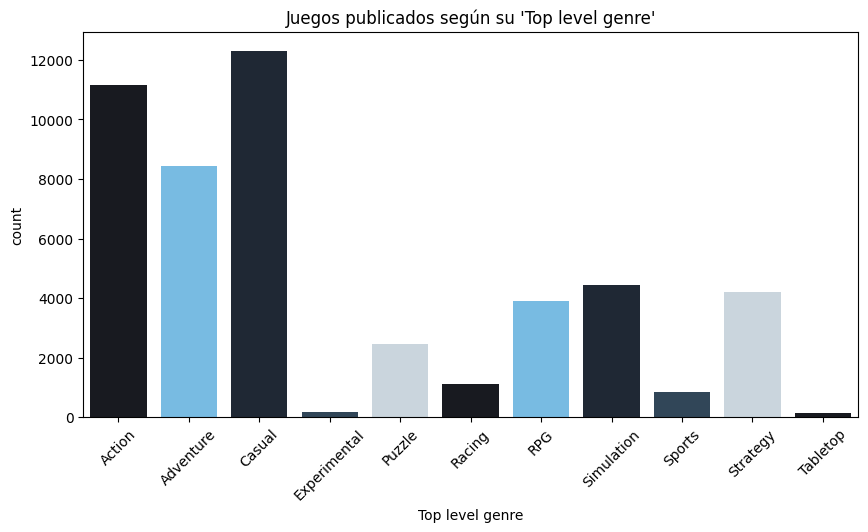

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x='Top level genre', data=df, palette=steam_palette, order=top_level_genres).set(title="Juegos publicados según su 'Top level genre'")
plt.xticks(rotation=45);

Los principales 'Top level genres' son *Casual*, *Action* y *Adventure*

#### 4.1.4 Genres

Al haber 61 géneros distintos, la gráfica tendrá un aspecto muy sucio:

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2817859909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres', data=df, palette=steam_palette, order=genres).set(title="Juegos publicados según su 'Genre'")
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2817859909.py:2: UserWarning: 
The palette list has fewer values (5) than needed (67) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Genres', data=df, palette=steam_palette, order=genres).set(title="Juegos publicados según su 'Genre'")


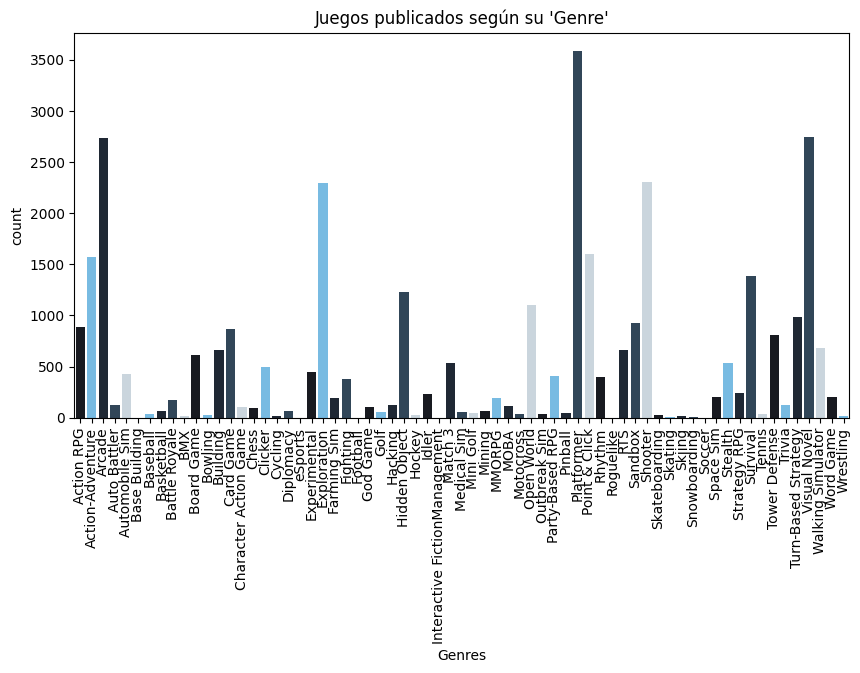

In [109]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genres', data=df, palette=steam_palette, order=genres).set(title="Juegos publicados según su 'Genre'")
plt.xticks(rotation=90);

Podemos representar sólo los **diez 'Genres' más populares** filtrando previamente el df

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4249853726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4249853726.py:6: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Genres',


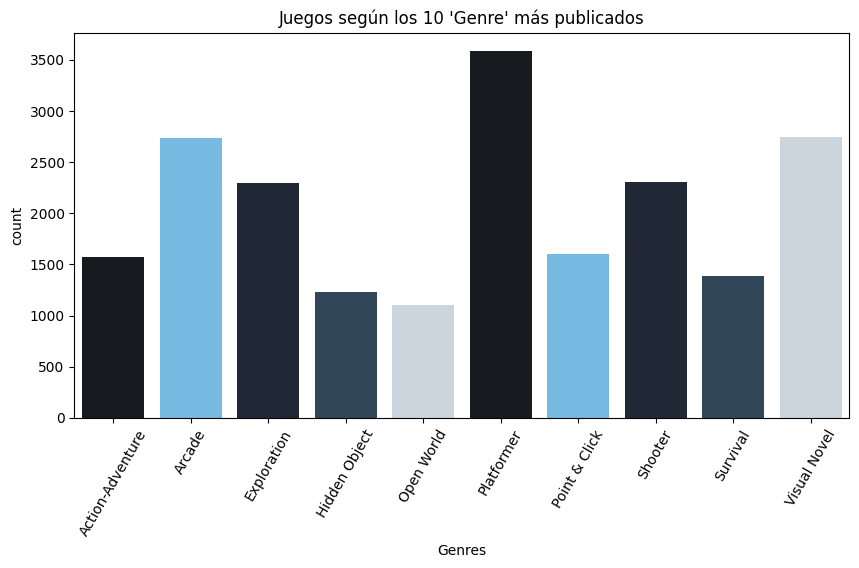

In [110]:
# df filtrado
top10_genres = df['Genres'].value_counts().head(10)

# gráfica
plt.figure(figsize=(10,5))
sns.countplot(x='Genres',
                  data=df[df['Genres'].isin(top10_genres.index)],
                  palette=steam_palette,
                  order=top10_genres.index.sort_values()).set(title="Juegos según los 10 'Genre' más publicados")
plt.xticks(rotation=60);

#### 4.1.5 Subgenres

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\699065373.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Subgenres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\699065373.py:6: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = 'Subgenres',


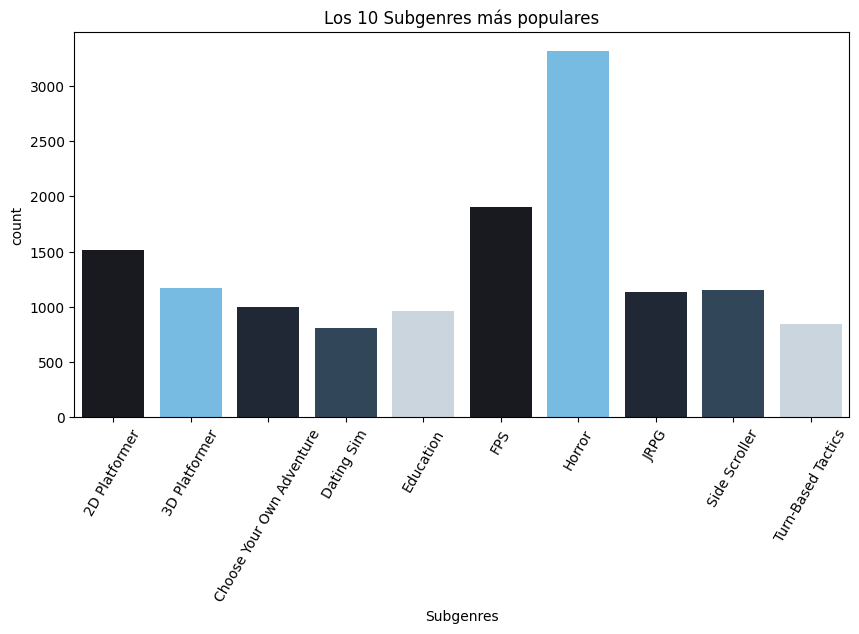

In [111]:
# df filtrado
top10_subgenres = df['Subgenres'].value_counts().head(10)

# gráfica
plt.figure(figsize=(10,5))
sns.countplot(x = 'Subgenres',
                  data = df[df['Subgenres'].isin(top10_subgenres.index)],
                  palette = steam_palette,
                  order = top10_subgenres.index.sort_values()).set(title='Los 10 Subgenres más populares')
plt.xticks(rotation=60);

Los principales 'Subgenres' son *Horror*, *FPS* y *2D Platformer*

#### 4.1.6 Visuals

Y lo mismo aquí

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2872073555.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x='Visuals',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2872073555.py:6: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  a = sns.countplot(x='Visuals',


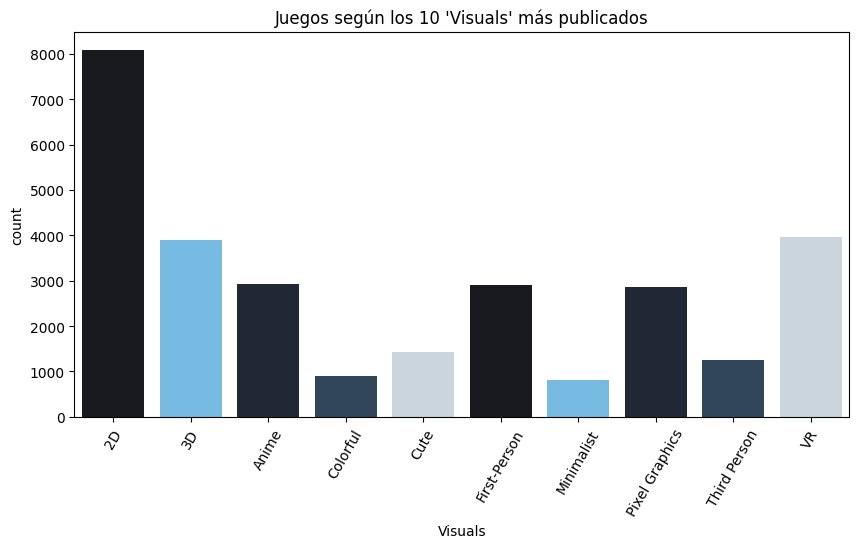

In [112]:
# df filtrado
top10_visuals = df['Visuals'].value_counts().head(10)

# gráfica
plt.figure(figsize=(10,5))
a = sns.countplot(x='Visuals',
                  data=df[df['Visuals'].isin(top10_visuals.index)],
                  palette=steam_palette,
                  order=top10_visuals.index.sort_values()).set(title="Juegos según los 10 'Visuals' más publicados")
plt.xticks(rotation=60);

El principal 'Visual' con diferencia es *2D*, los siguientes dos visuales más publicados son *3D* y *VR*.

#### 4.1.7 Players

Aquí no es necesario

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\740519553.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Players', data=df, palette=steam_palette, order=players).set(title="Juegos publicados según su 'Players'")
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\740519553.py:2: UserWarning: 
The palette list has fewer values (5) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Players', data=df, palette=steam_palette, order=players).set(title="Juegos publicados según su 'Players'")


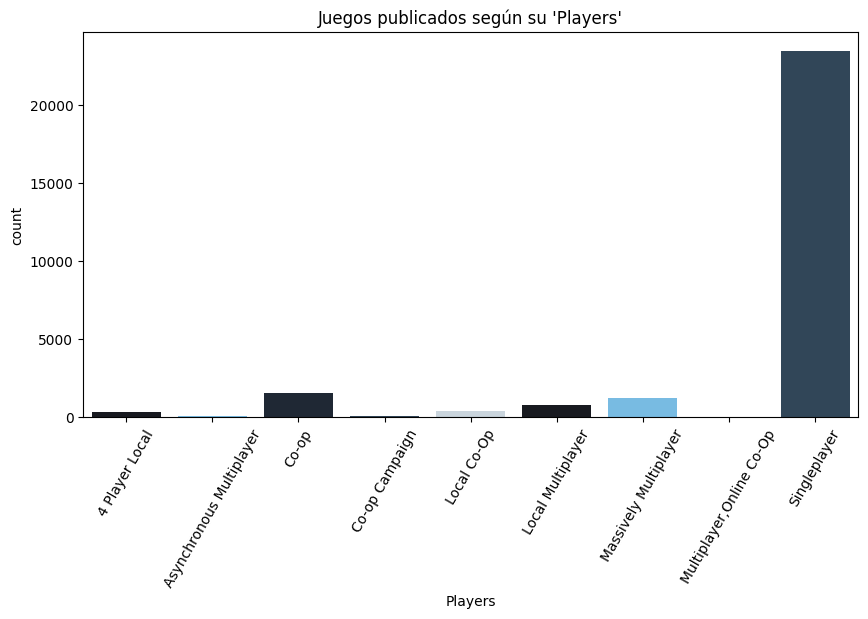

In [113]:
plt.figure(figsize=(10,5))
sns.countplot(x='Players', data=df, palette=steam_palette, order=players).set(title="Juegos publicados según su 'Players'")
plt.xticks(rotation=60);

En este caso queda claro que la categoría principal de 'Players' es *Singleplayer*, muy destacada del resto de categorías.

### 4.1.8 Publisher(s)

Con esta columna tenemos el mismo problema que con las anteriores, la diversidad de valores es enorme.<BR>
Por ello, sólo graficaremos los **10 editores que más juegos tienen publicados** en la plataforma.

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3801981801.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(x='Publisher(s)',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3801981801.py:5: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  a = sns.countplot(x='Publisher(s)',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3801981801.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a.set_xticklabels(a.get_xticklabels(), rotation=60);


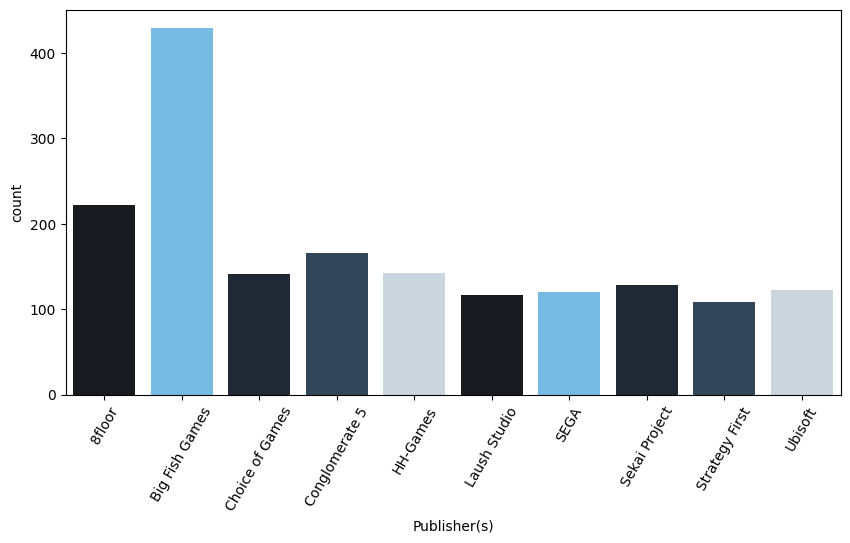

In [114]:
top10_publishers = df['Publisher(s)'].value_counts().head(10)

# gráfica
plt.figure(figsize=(10,5))
a = sns.countplot(x='Publisher(s)',
                  data=df[df['Publisher(s)'].isin(top10_publishers.index)],
                  palette=steam_palette,
                  order=top10_publishers.index.sort_values())
a.set_xticklabels(a.get_xticklabels(), rotation=60);

El editor con más juegos en Steam es Big Fish Games, seguido de 8floor y Conglomerate 5.<br>
Cabe destacar, en comparación con éstos, la escasa presencia de estudios AAA como SEGA o Ubisoft. Una vez más, esto puede deberse a que Steam no es su principal plataforma de distribución, ya que ésta está más centrada en juegos independientes. Además, el modelo de producción de los estudios triple A suele estar más centrado en la calidad y duración de los juegos que en la cantidad de juegos producidos.

Y con esto termina el análisis univariante

## 4.2 Análisis bivariante

### Cuantitativa vs Cualitativa

#### 4.2.1 Precio vs Top level genre

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3319672147.py:2: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x = 'Top level genre',


<Figure size 2000x500 with 0 Axes>

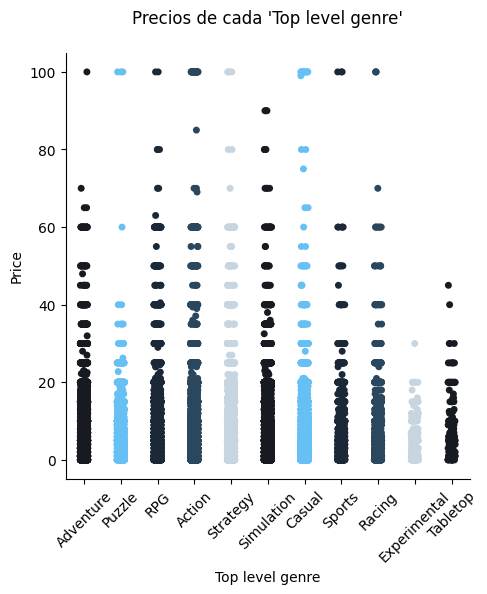

In [115]:
plt.figure(figsize=(20,5))
sns.catplot(x = 'Top level genre',
           y = 'Price',
           hue = 'Top level genre',
           palette = steam_palette,
           legend = False,
           data = df).set(title = "Precios de cada 'Top level genre'\n")
plt.xticks(rotation=45);

Parece ser que la mayoría de los juegos, independientemente de su 'Top level genre', concentran los precios entre los 0 y los 20$, tal y como mostró la gráfica univariante de los precios.<br>
Los únicos dos 'Top level genres' que parecen no tener precios superiores a los 40$ (a excepción de algún outlier) son los de tipo Puzzle, Tabletop y Experimental. Esto también tiene sentido, puesto que los juegos de puzzles, los de mesa (*Tabletop*) o los experimentales suelen ser menos demandados por el público general, más orientado a los juegos de acción.<br>
Teniendo en cuenta que no hay una correlación entre 'Top level genre' y 'Precio', no tiene sentido hacerlo para las categorías más específicas 'Genre', 'Subgenre' y 'Visuals'.

#### 4.2.2 Precio vs Editor(es)

¿Qué rango de precios tienen los juegos publicados por los 10 editores con más juegos publicados en Steam?

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2177556535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Publisher(s)',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2177556535.py:1: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x = 'Publisher(s)',


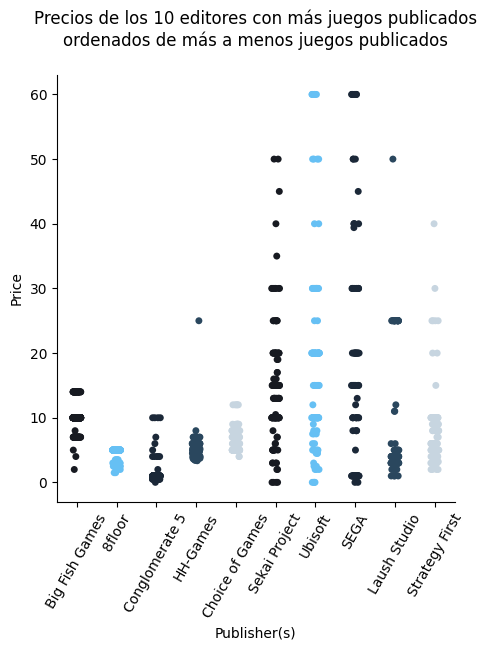

In [116]:
sns.catplot(x = 'Publisher(s)',
           y = 'Price',
           palette = steam_palette,
           legend = False,
           order = top10_publishers.index,
           data = df[df['Publisher(s)'].isin(top10_publishers.index)]).set(title="Precios de los 10 editores con más juegos publicados\nordenados de más a menos juegos publicados\n")
plt.xticks(rotation=60);

Observamos que los títulos de los 5 estudios con más juegos publicados tienen un precio inferior a los 20$. Probablemente su estrategia sea sacar **beneficio a través de la cantidad y la asequibilidad** de sus títulos.<br><br>
En cambio, estudios AAA como Ubisoft y SEGA, aunque sacan menos juegos, tienen títulos más caros, con precios entre los 20$ y los 60$. La estrategia de estos estudios es diferente: en vez de basarse en la cantidad de publicaciones, destinan **mayor cantidad de recursos a menos productos para luego sacarlos al mercado con un precio mayor**.

#### 4.2.3 Precio vs Propietarios

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\750858441.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'Owners',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\750858441.py:1: UserWarning: 
The palette list has fewer values (5) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x = 'Owners',


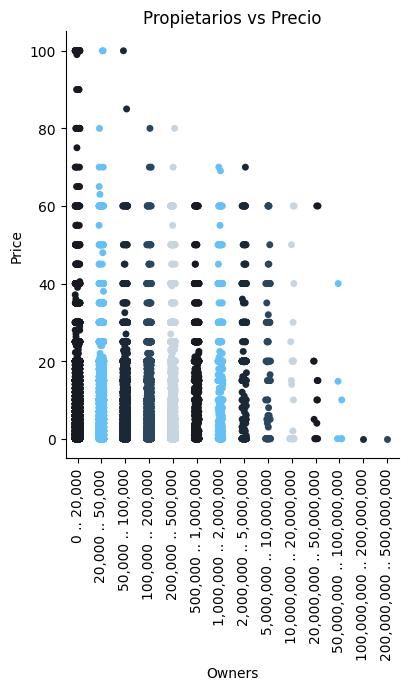

In [117]:
sns.catplot(x = 'Owners',
           y = 'Price',
           palette = steam_palette,
           legend = False,
           data = df).set(title="Propietarios vs Precio")
plt.xticks(rotation=90);

El resultado de esta gráfica es **trivial**: evidentemente, los juegos más baratos tienen más probabilidades de ser adquiridos que los más caros, y más aún si son gratis.<br><br>
Para explorar adecuadamente esta variable, no queda más remedio que *falsear* ligeramente los datos. En lugar de tratarlos de manera categórica como rango, se asignará el entero correspondiente a la media de dicho rango.

In [8]:
df.replace({'Owners' : {'0\xa0..\xa020,000' : 10000,
                        '20,000\xa0..\xa050,000' : 35000,
                        '50,000\xa0..\xa0100,000' : 75000,
                        '100,000\xa0..\xa0200,000' : 150000,
                        '200,000\xa0..\xa0500,000' : 350000,
                        '500,000\xa0..\xa01,000,000' : 750000,
                        '1,000,000\xa0..\xa02,000,000' : 1500000,
                        '2,000,000\xa0..\xa05,000,000' : 3500000,
                        '5,000,000\xa0..\xa010,000,000' : 7500000,
                        '10,000,000\xa0..\xa020,000,000' : 15000000,
                        '20,000,000\xa0..\xa050,000,000' : 35000000,
                        '50,000,000\xa0..\xa0100,000,000' : 75000000,
                        '100,000,000\xa0..\xa0200,000,000' : 150000000,
                        '200,000,000\xa0..\xa0500,000,000' : 350000000}}, inplace=True)

df['Owners'] = df['Owners'].astype('int')

Ahora ya podemos tratarlo como una variable cuantitativa

#### 4.2.4 Propietarios vs Top level genre

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\781391225.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\781391225.py:1: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),


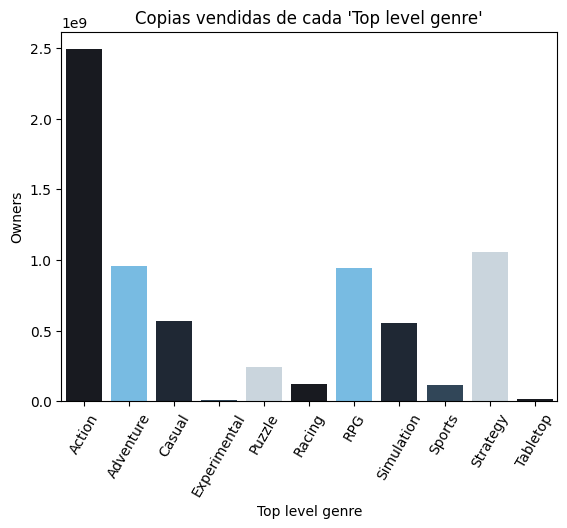

In [119]:
sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),
            palette=steam_palette, order=top_level_genres).set(title="Copias vendidas de cada 'Top level genre'")
plt.xticks(rotation=60);

Los 'Top level genre' de los juegos más comprados son **Action**, **Strategy** y **Adventure** o **RPG**.<br>
Esto contrasta ligeramente con los principales 'Top level genres' publicados (Casual, Action y Adventure). Es decir, aunque no son los principales juegos producidos, Strategy y Adventure son dos de los más comprados.<br>
Destaca especialmente los 'Top level genre' **Casual** y **Adventure**, los cuales son mucho más producidos que comprados.<br><br>
En la siguiente gráfica se puede observar la comparativa más comodamente.

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3130536551.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3130536551.py:3: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),


C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3130536551.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Top level genre',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\3130536551.py:9: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='Top level genre',


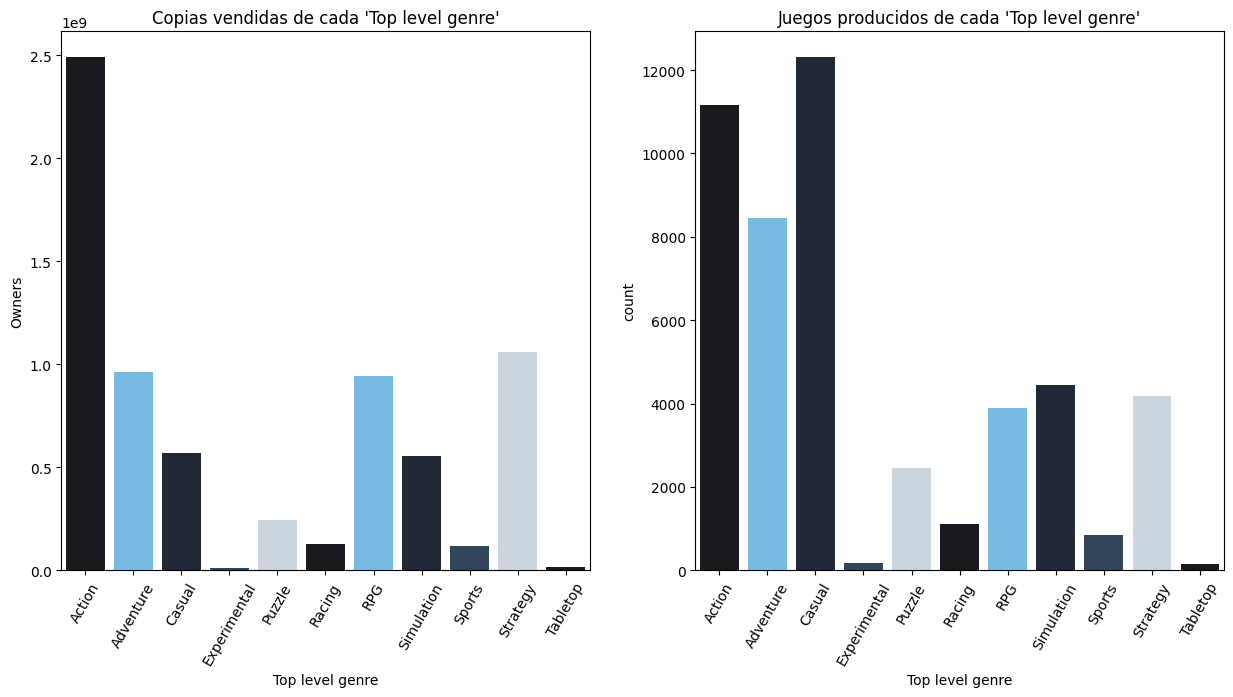

In [120]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=df.groupby('Top level genre')['Owners'].sum(),
            palette=steam_palette,
            order=top_level_genres).set(title="Copias vendidas de cada 'Top level genre'")
plt.xticks(rotation=60);

plt.subplot(1,2,2)
sns.countplot(x='Top level genre',
              data=df,
              palette=steam_palette,
              order=top_level_genres).set(title="Juegos producidos de cada 'Top level genre'")
plt.xticks(rotation=60);

#### 4.2.5 Propietarios vs Genre

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4144787238.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df[df['Genres'].isin(top10_genres.index)].groupby('Genres')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4144787238.py:3: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df[df['Genres'].isin(top10_genres.index)].groupby('Genres')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4144787238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\4144787238.py:9: UserWarning: 
The pale

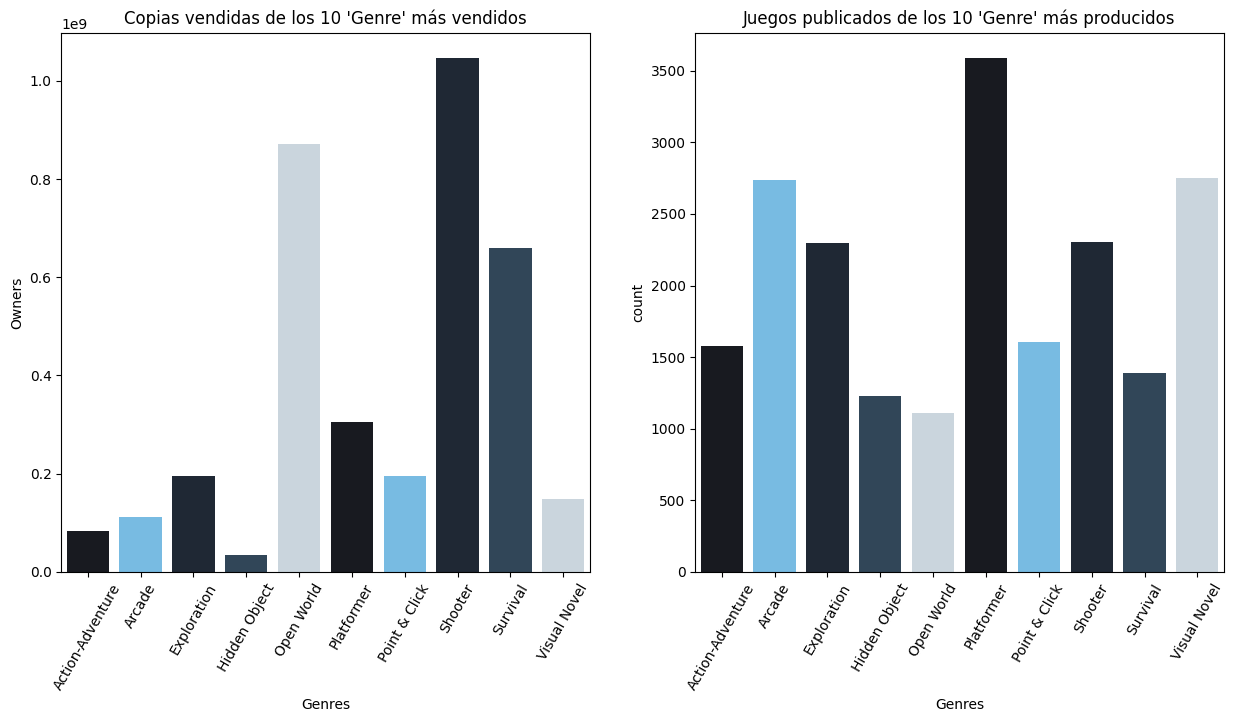

In [137]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data=df[df['Genres'].isin(top10_genres.index)].groupby('Genres')['Owners'].sum(),
            palette=steam_palette,
            order=top10_genres.index.sort_values()).set(title="Copias vendidas de los 10 'Genre' más vendidos")
plt.xticks(rotation=60);

plt.subplot(1,2,2)
sns.countplot(x='Genres',
              data=df[df['Genres'].isin(top10_genres.index)],
              palette=steam_palette,
              order=top10_genres.index.sort_values()).set(title="Juegos publicados de los 10 'Genre' más producidos")
plt.xticks(rotation=60);

Los juegos más comprados de cada 'Genre' son los tipo **Shooter**, **Open World**, y **Survival**.<br>
Por otro lado, volvemos a tener una falta de correspondencia entre lo que más se vende y lo que más se produce. Por ejemplo:
- Se compran muchísimos menos juegos de tipo Platformer y Visual Novel de los que se producen. Podríamos argumentar que el mercado está un poco saturado de este tipo de juegos
- Se compran muchos más juegos de tipo Open World de los que se producen. Esto podría deberse al elevado coste de desarrollar juegos de este tipo, ya que requieren mucho contenido

#### 4.2.6 Propietarios vs Visuals

C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2167922999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df[df['Visuals'].isin(top10_visuals.index)].groupby('Visuals')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2167922999.py:3: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data = df[df['Visuals'].isin(top10_visuals.index)].groupby('Visuals')['Owners'].sum(),
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2167922999.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Visuals',
C:\Users\rodri\AppData\Local\Temp\ipykernel_6704\2167922999.py:9: UserWarni

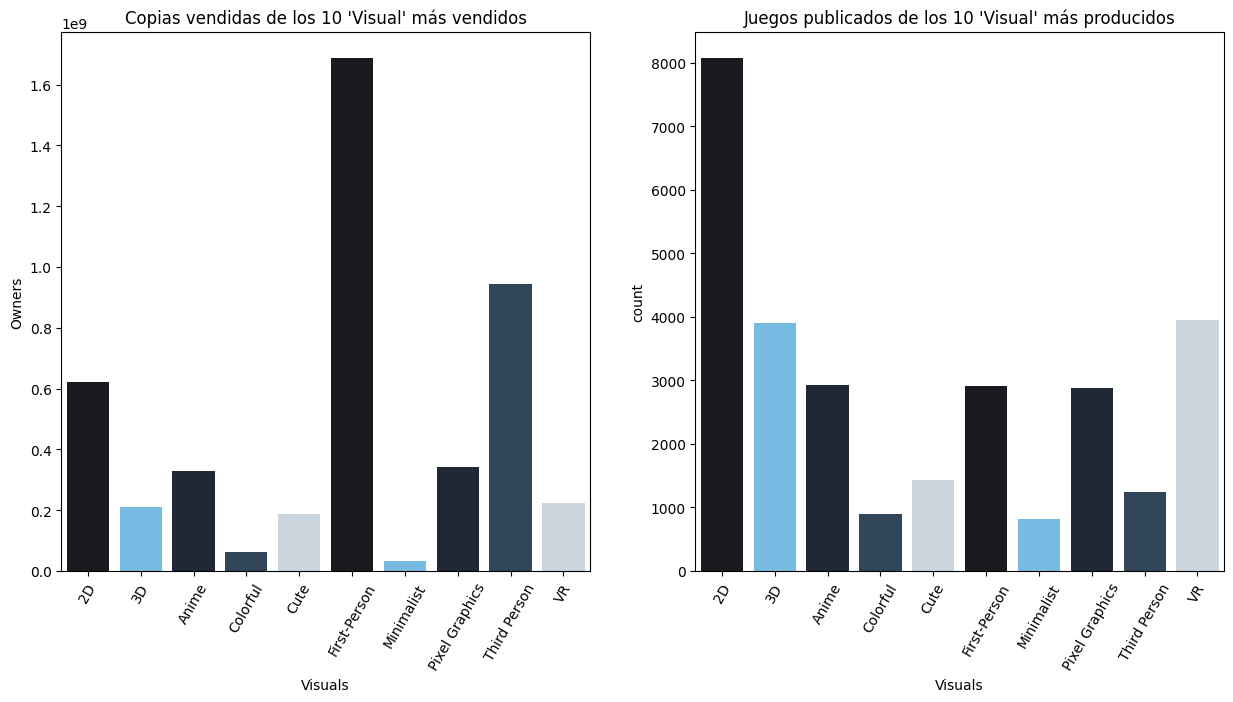

In [138]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(data = df[df['Visuals'].isin(top10_visuals.index)].groupby('Visuals')['Owners'].sum(),
            palette = steam_palette,
            order = top10_visuals.index.sort_values()).set(title="Copias vendidas de los 10 'Visual' más vendidos")
plt.xticks(rotation=60);

plt.subplot(1,2,2)
sns.countplot(x = 'Visuals',
              data = df[df['Visuals'].isin(top10_visuals.index)],
              palette = steam_palette,
              order = top10_visuals.index.sort_values()).set(title="Juegos publicados de los 10 'Visual' más producidos")
plt.xticks(rotation=60);

Los juegos más comprados de cada 'Visual' son los tipo **First-Person**, **Third Person**, y **2D**.<br>
Por otro lado, volvemos a tener faltas de correspondencia entre lo que más se vende y lo que más se produce. Por ejemplo:
- Se compran muchísimos menos juegos de tipo 2D y VR de los que se producen.
    - El **2D** es el tipo de 'Visual' más económico de crear, por lo que suele ser el más escogido por los desarrolladores noveles.
    - El 'Visual' **VR** todavía está despegando, y aunque cada vez hay más desarrolladores que se lanzan a crear juegos de este tipo, los usarios no disponen de la tecnología para consumirlos (e.g.: Steam VR, Meta Quest, Sony PlayStation VR2...) porque su precio es elevado.
- Se compran muchos más juegos de tipo First-Person de los que se producen. Esto podría deberse a que haya unos pocos juegos de este tipo que han tenido mucho éxito (e.g.: *Call of Duty*) y por eso, aunque no se produzcan tanto, la cantidad tan grande de juegos vendidos por unos pocos supera a la producción de este tipo.

### Cualitativa vs Cualitativa

En este capítulo, analizaremos más en profundidad las subcategorías de cada 'Top level genre'.<br>
Para que las gráficas sean más legibles, contaremos solo con el **top 5 de cada categoría**.

In [123]:
# Instanciamos nuevas variables
top5_top_level_genre = df['Top level genre'].value_counts().head(5).index
top5_genres = df['Genres'].value_counts().head(5).index
top5_subgenres = df['Subgenres'].value_counts().head(5).index
top5_visuals = df['Visuals'].value_counts().head(5).index

#### 4.2.7 Top level genres y Genres

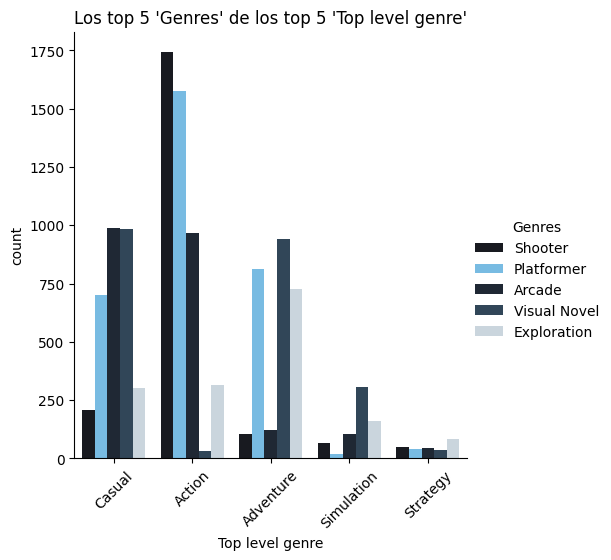

In [124]:
sns.catplot(x='Top level genre',
            hue='Genres',
            kind='count',
            palette=steam_palette,
            order=top5_top_level_genre,
            data=df[df['Top level genre'].isin(top5_top_level_genre) & df['Genres'].isin(top5_genres)]).set(title="Los top 5 'Genres' de los top 5 'Top level genre'")
plt.xticks(rotation=45);

#### 4.2.8 Top level genres y Visuals

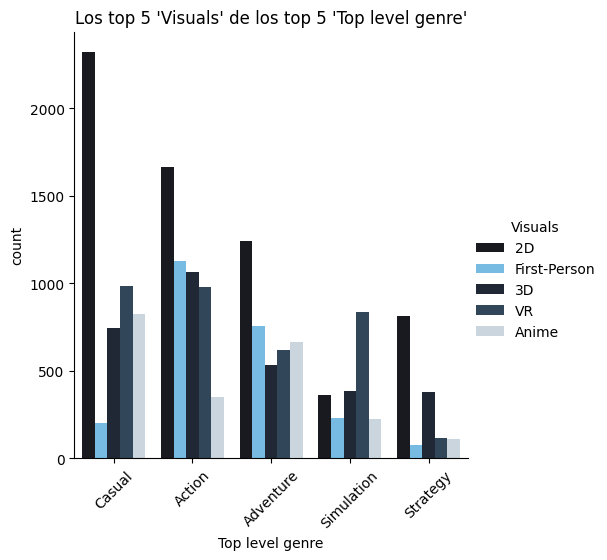

In [125]:
sns.catplot(x='Top level genre',
            hue='Visuals',
            kind='count',
            palette=steam_palette,
            order=top5_top_level_genre,
            data=df[df['Top level genre'].isin(top5_top_level_genre) & df['Visuals'].isin(top5_visuals)]).set(title="Los top 5 'Visuals' de los top 5 'Top level genre'")
plt.xticks(rotation=45);

De esta gráfica podemos extraer que el 'Visual' elegido con más frecuencia para cada 'Top level genre' es el 2D, a excepción del 'Top level genre' Simulation, el cual emplea más frecuentemente el 'Visual' VR.<br>
Esto último puede deberse a que, desde la invención de los juegos en formato realidad virtual (VR), la etiqueta Simulation ha pasado a englobar tanto juegos de simulación de tareas (e.g.: conducir camiones, dirigir negocios, reparar objetos...) como juegos en formato de realidad virtual.

#### 4.2.9 Genres y Subgenres

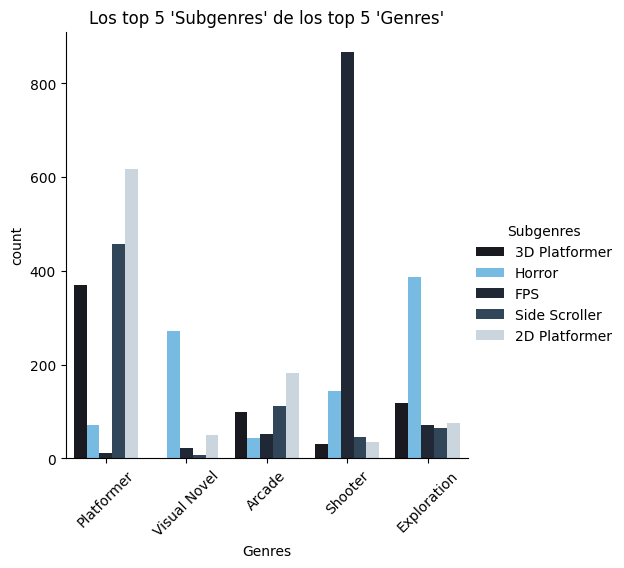

In [126]:
sns.catplot(x='Genres',
            hue='Subgenres',
            kind='count',
            palette=steam_palette,
            order=top5_genres,
            data=df[df['Genres'].isin(top5_genres) & df['Subgenres'].isin(top5_subgenres)]).set(title="Los top 5 'Subgenres' de los top 5 'Genres'")
plt.xticks(rotation=45);

De esta gráfica podemos obtener **cuatro datos relevantes**:
1. Los juegos de Plataformas se desarrollan más en 3D que en 2D
2. Los juegos Visual Novel tienden a ser de Terror
3. Los juegos Arcade no tienden a ser más de ninguno de estos 5 subgéneros en concreto
4. Los juegos de Exploración tienden a ser de Terror


Cabe destacar que este análisis es muy restrictivo, ya que solo estamos teniendo en cuenta los 5 Géneros y Subgéneros más comunes.<br><br>

También hay un **dato trivial**:
- Los juegos Shooter, casi en su totalidad, se categorizan como FPS. Esto probablemente se deba a que FPS significa First Person *Shooter*

#### 4.2.10 Genres y Visuals

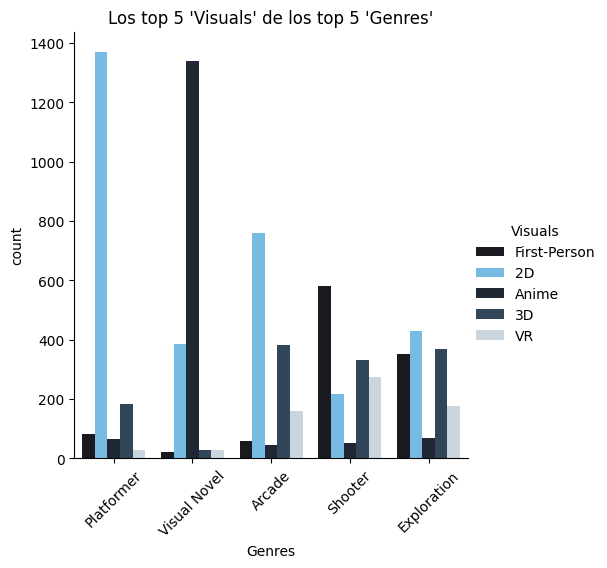

In [127]:
sns.catplot(x='Genres',
            hue='Visuals',
            kind='count',
            palette=steam_palette,
            order=top5_genres,
            data=df[df['Genres'].isin(top5_genres) & df['Visuals'].isin(top5_visuals)]).set(title="Los top 5 'Visuals' de los top 5 'Genres'")
plt.xticks(rotation=45);

En esta gráfica observamos varios datos:
- La información del 'Genre' Platformer coincide con la de la tabla anterior, aunque de manera mucho más destacada: la inmensa mayoría de los juegos Platformer emplean el 'Visual' 2D (en la gráfica anterior vimos que el 'Subgenre' más popular dentro del 'Genre' Platformer era el 2D Platformer)
- El principal 'Visual' del 'Genre' Visual Novel es el anime. Personalmente, desconocía la existencia de dicho nicho.
- El principal 'Visual' del 'Genre' Arcade es el 2D, lo cual tiene bastante sentido de acuerdo a este género: emula las primeras máquinas de Arcade, cuyos Visuales eran en 2D
- Con el 'Genre' Shooter volvemos a tener el mismo fenómeno que en la gráfica anterior: si la etiqueta First Person Shooter incluye la etiqueta First-Person, no es raro que a éstos también se les denomine Shooters para abreviar, y por tanto vuelvamos a tener un solapamiento entre etiquetas
- Del 'Genre' Exploration sólo podemos sacar en claro que cultiva el 'Visual' Anime

#### 4.2.11 Subgenres y Visuals

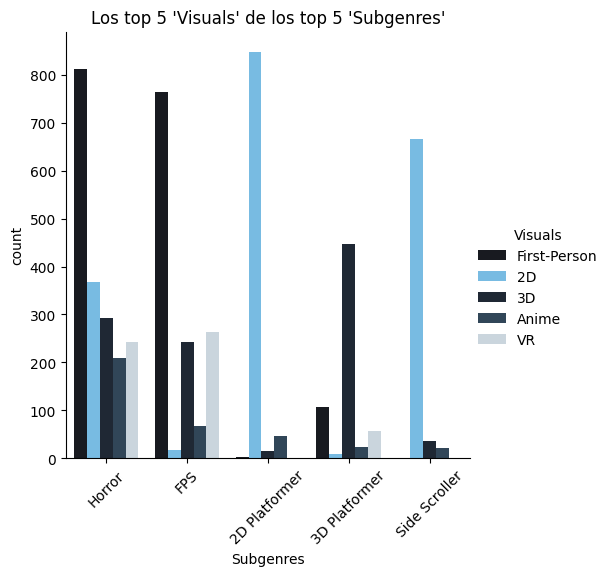

In [128]:
sns.catplot(x='Subgenres',
            hue='Visuals',
            kind='count',
            palette=steam_palette,
            order=top5_subgenres,
            data=df[df['Subgenres'].isin(top5_subgenres) & df['Visuals'].isin(top5_visuals)]).set(title="Los top 5 'Visuals' de los top 5 'Subgenres'")
plt.xticks(rotation=45);

Esta gráfica ofrece **cuatro datos absolutamente triviales**:
1. La gran mayoría de los juegos FPS (Disparos en Primera Persona) se crean con el visual First-Person (Primera Persona)
2. La gran mayoría de los juegos 2D Platformer se crean con el visual 2D
3. La gran mayoría de los juegos 3D Platformer se crean con el visual 3D
4. La gran mayoría de los juegos Side Scroller (Vista Lateral) se crean con el visual 2D

De hecho, si son *la gran mayoría* y no *todos* es porque debe haber jugadores que etiquetan los juegos erróneamente, ya que en estos casos el 'Visual' viene implícito en el propio 'Subgenre'.<br><br>

Aún así, sí que hay un **dato no trivial** que se puede extraer de aquí:
- La mayor parte de los juegos de Terror se desarrollan la vista First-Person. Esto es una práctica muy habitual, ya que este tipo de vista oculta gran parte del campo visual, y permite jugar con elementos fuera de cámara, sustos, etcétera.

**CONCLUSIÓN**: la gran abundancia de solapamientos entre etiquetas de distintas categorías deja de manifiesto la escasa eficiencia con la que la plataforma Steam ha diseñado su sistema de etiquetado.

## 4.3 Análisis multivariante

Debido a la naturaleza y cardinalidad de estos datos, se hace difícil obtener información de todos los datos a la vez con el análisis multivariante.<br>
Por ejemplo, si queremos analizar si hay alguna correlación entre los precios menores a 20$, los 'Top level genre' *y* los 'Genre', obtenemos la siguiente gráfica:

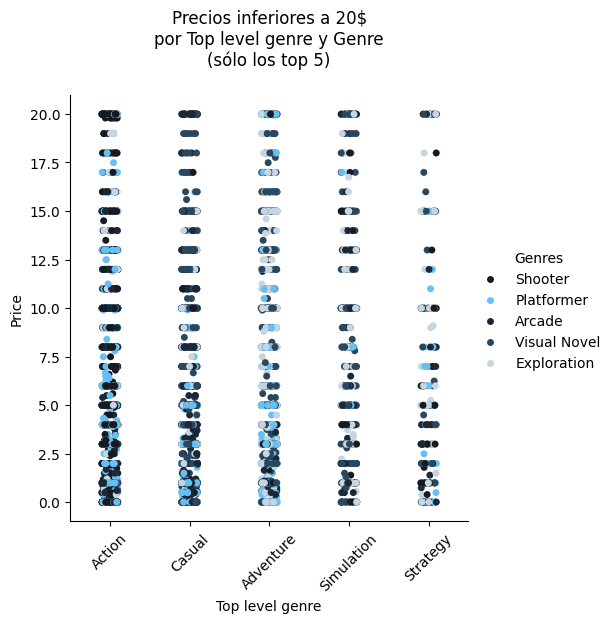

In [129]:
sns.catplot(x = 'Top level genre',
           y = 'Price',
           hue = 'Genres',
           palette = steam_palette,
           data = df[df['Top level genre'].isin(top5_top_level_genre) & df['Genres'].isin(top5_genres) & (df['Price'] < 20)]).set(title='Precios inferiores a 20$\npor Top level genre y Genre\n(sólo los top 5)\n')

plt.xticks(rotation=45);

Esta gráfica no nos permite esclarecer ninguna información, más allá de que **no parece haber ninguna correlación entre el precio y cualquiera de los dos géneros**.<br><br>
Sin embargo, podemos acotar un poco más el análisis y realizar preguntas en relación a un único factor, por ejemplo: *¿de qué tipo y qué precio tienen los juegos del editor SEGA?*

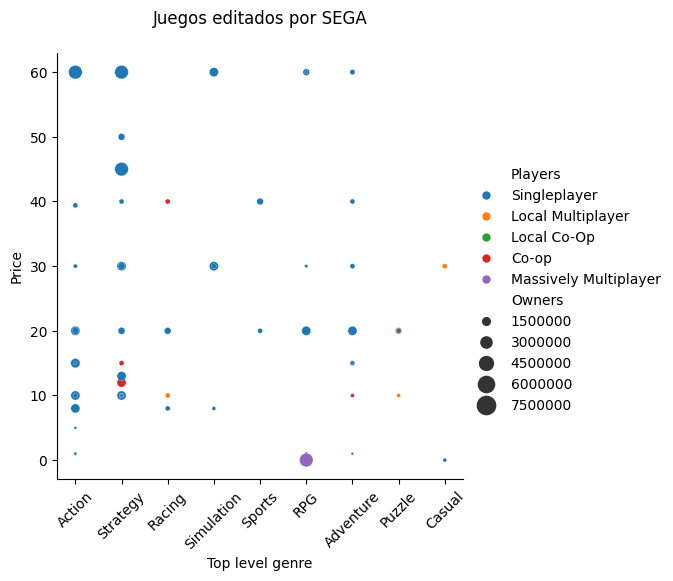

In [130]:
sns.relplot(x = 'Top level genre',
           y = 'Price',
           size = 'Owners',
           hue = 'Players',
           sizes=(4, 200),
           data = df[df['Publisher(s)'] == 'SEGA']).set(title='Juegos editados por SEGA\n')
plt.xticks(rotation=45);

*¿y Ubisoft?*

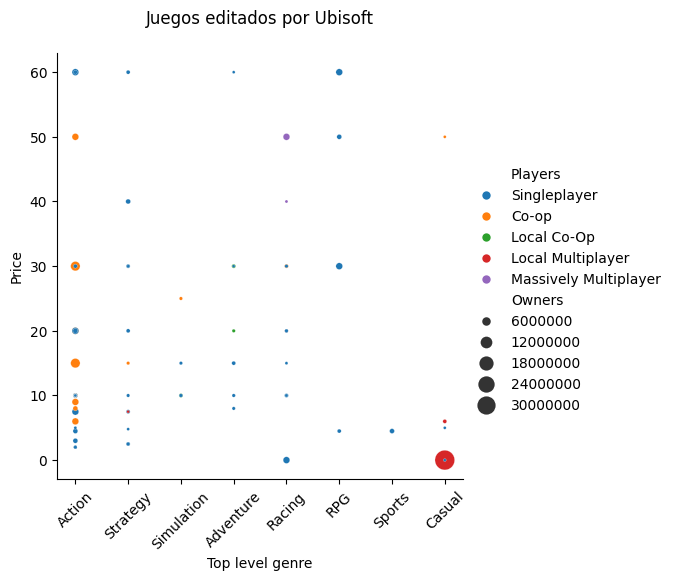

In [131]:
sns.relplot(x = 'Top level genre',
           y = 'Price',
           size = 'Owners',
           hue = 'Players',
           sizes=(4, 200),
           data = df[df['Publisher(s)'] == 'Ubisoft']).set(title='Juegos editados por Ubisoft\n')
plt.xticks(rotation=45);

Esto nos será útil en el caso de estudio (siguiente capítulo)

## 4.4 Hipótesis

Recuperamos las hipótesis que establecimos al inicio del proyecto.

Hipótesis principal:<br><br>
1. *"Tanto los juegos Simulation como los Rhythm tienen un volumen de ventas pequeño comparado con el de otros géneros del mercado"* <br><br>

Más hipótesis:<br><br>

2. *"Los juegos Simulation se venden más que los Rhythm"*<br>
3. *"Tanto los juegos de tipo Ryhthm como los de tipo Simulation suponen menos de un 20% de los juegos que se publicaron el último año"*<br>
4. *"Los juegos tipo Rhythm suponen menos del 5% del total de juegos en Steam"*<br>
5. *"No hay una época del año específica en la que se publiquen más juegos narrativos o rítmicos"*

### 1. *"Tanto los juegos Simulation como los Rhythm tienen un volumen de ventas pequeño comparado con el de otros géneros del mercado"*

C:\Users\rodri\AppData\Local\Temp\ipykernel_1596\4260996996.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Top level genre',
C:\Users\rodri\AppData\Local\Temp\ipykernel_1596\4260996996.py:2: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Top level genre',


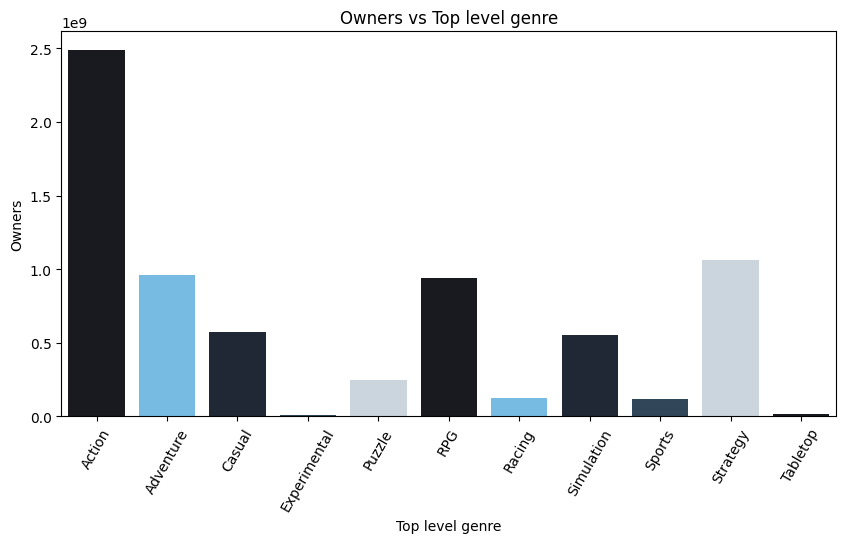

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='Top level genre',
            y='Owners',
            data=pd.DataFrame(df.groupby('Top level genre')['Owners'].sum()),
            palette=steam_palette).set(title='Owners vs Top level genre')
plt.xticks(rotation=60);

C:\Users\rodri\AppData\Local\Temp\ipykernel_1596\1600212281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Genres',
C:\Users\rodri\AppData\Local\Temp\ipykernel_1596\1600212281.py:2: UserWarning: 
The palette list has fewer values (5) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Genres',


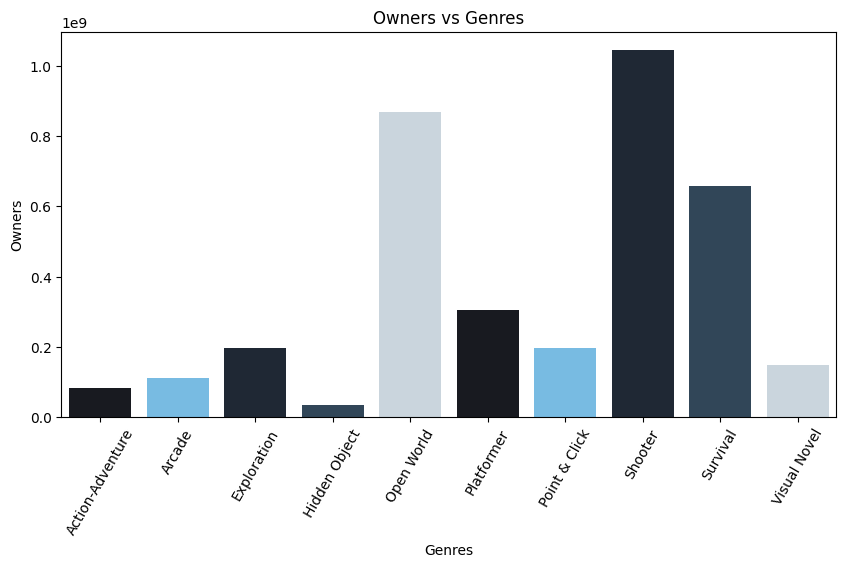

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genres',
            y='Owners',
            data=pd.DataFrame(df[df['Genres'].isin(top10_genres.index)].groupby('Genres')['Owners'].sum()),
            palette=steam_palette,
            order=top10_genres.index.sort_values()).set(title='Owners vs Genres')
plt.xticks(rotation=60);

*La hipótesis queda **refutada**:* aunque el 'Genre' *Rhythm* no se encuentre entre las etiquetas más vendidas, *Simulation* sí se encuentra entre las cinco primeras

### 2. *"Los juegos Simulation se venden más que los Rhythm"*

In [135]:
df[df['Top level genre']=='Simulation']['Owners'].sum() > df[df['Genres']=='Rhythm']['Owners'].sum()

True

*La hipótesis queda **confirmada***

### 3. *"Tanto los juegos de tipo Rhythm como los de tipo Simulation suponen menos de un 20% de los juegos que se publicaron el último año"*<br>

In [183]:
simulation_2022 = ((df[(df['Release date'].dt.year == 2022)]['Top level genre'].value_counts().at['Action'] / df[df['Release date'].dt.year == 2022].shape[0]) * 100).round(2)
rhythm_2022 = ((df[(df['Release date'].dt.year == 2022)]['Genres'].value_counts().at['Rhythm'] / df[df['Release date'].dt.year == 2022].shape[0]) * 100).round(2)

print(f"Los juegos tipo Simulation publicados en 2022 suponen un {simulation_2022}% del total")
print(f"Los juegos tipo Simulation publicados en 2022 suponen un {rhythm_2022}% del total")

Los juegos tipo Simulation publicados en 2022 suponen un 22.26% del total
Los juegos tipo Simulation publicados en 2022 suponen un 1.01% del total


*La hipótesis queda **refutada**:* aunque el porcentaje de juegos tipo *Rhythm* publicados en 2022 no supere ni el 5%, *Simulation* sí supera el 20%.

### 4. *"Los juegos tipo Rhythm suponen menos del 5% del total de juegos en Steam"*<br>

In [187]:
rhythm_2008_2022 = ((df['Genres'].value_counts().at['Rhythm'] / df.shape[0]) * 100).round(2)

print(f"Los juegos tipo Rhythm publicados entre 2008 y 2022 suponen un {rhythm_2008_2022}% del total")

Los juegos tipo Rhythm publicados entre 2008 y 2022 suponen un 0.81% del total


*La hipótesis queda **confirmada***

### 5. *"No hay una época del año específica en la que se publiquen más juegos tipo Simulation"*

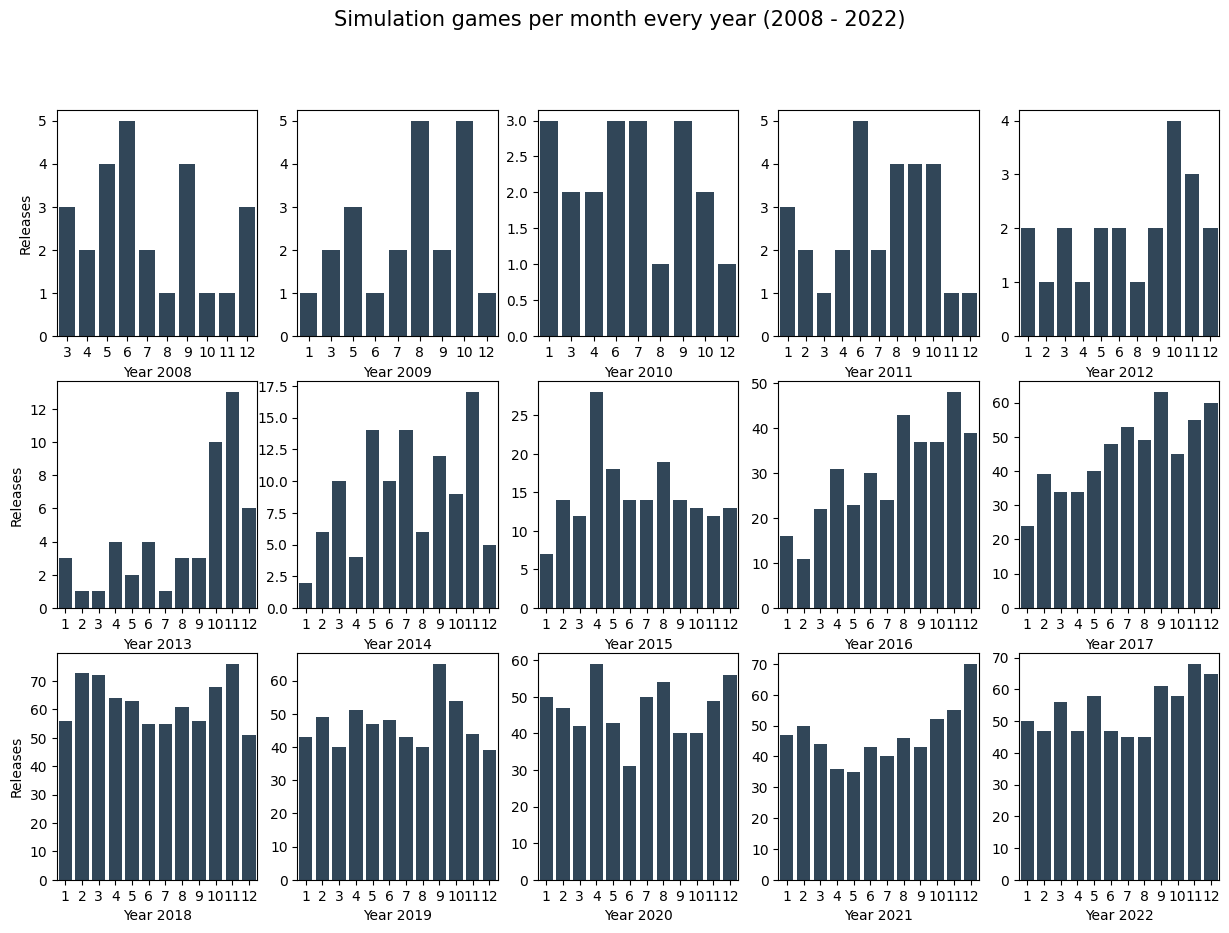

In [192]:
fig = plt.figure(figsize=(15,10))
fig.suptitle('Simulation games per month every year (2008 - 2022)', fontsize=15)

for index, year in enumerate(year_list):
    plt.subplot(3,5,index+1).set(xlabel=f'Year {year}', ylabel=' ')
    if index + 1 in [1,6,11]:
        plt.subplot(3,5,index+1).set(ylabel='Releases')
    sns.countplot(x='Release date', data=pd.DataFrame(df[(df['Release date'].dt.year == year) & (df['Top level genre'] == 'Simulation')]['Release date'].dt.month), color=c4);

Si consideramos las gráficas a partir de 2010, año a partir del cual la cantidad de juegos tipo Rhythm empieza a ser algo significativa, no observamos ninguna tendencia significativa en el mes de publicación, más allá de la tendencia general a publicar juegos a fin de año que ya observamos en el análisis univariante.

*La hipótesis queda **confirmada***

<hr>

<div style="display: flex; justify-content: space-between; margin-bottom: 10px;">
    <div style="text-align: left;">
        <a href="./3_expanding_data.ipynb">
            <button>&#8592; 3. Expanding data </button>
        </a>
    </div>
    <div style="text-align: right;">
        <a href="./5_case_study.ipynb">
            <button>5. Case study &#8594;</button>
        </a>
    </div>
</div>

<hr>